<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/CNN-RNN/2.2-FakeNewsDetector_CNN_seq_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import gensim

from nltk import download
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [2]:
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [4]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [5]:
df_reliable = pd.read_csv("Reliable.csv")
df_fake = pd.read_csv("Fake.csv")

In [6]:
df_reliable['isfake'] = 1

In [7]:
df_fake['isfake'] = 0

In [8]:
df = pd.concat([df_reliable, df_fake]).reset_index(drop = True)

In [9]:
df['original'] = df['title'] + ' ' + df['text']
df.head(3)

,title,text,subject,date,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...


In [10]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [12]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result


In [13]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [14]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [15]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [16]:
len(list_of_words)
total_words = len(list(set(list_of_words)))
total_words

108704

In [17]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head(2)

,title,text,subject,date,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...


In [18]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

<Axes: xlabel='count', ylabel='subject'>

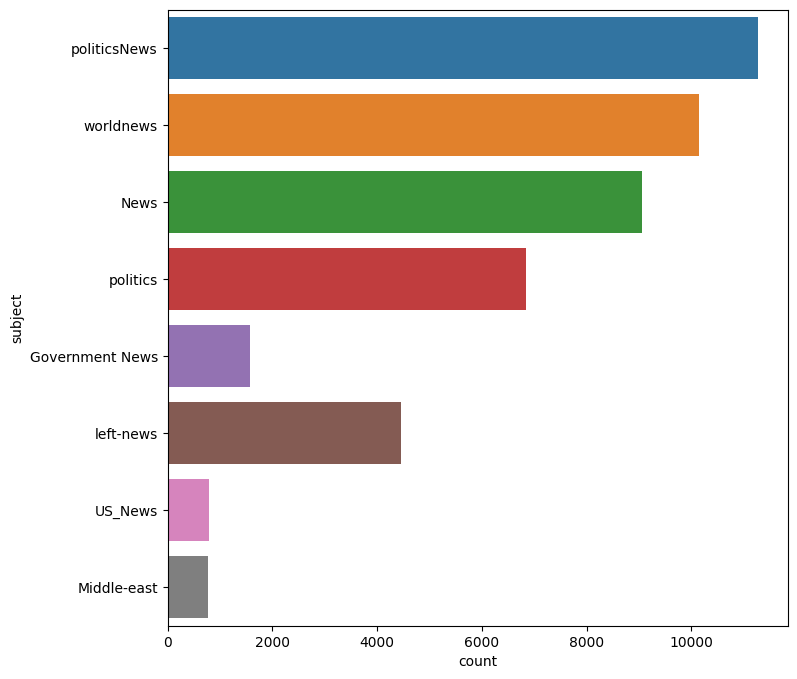

In [19]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

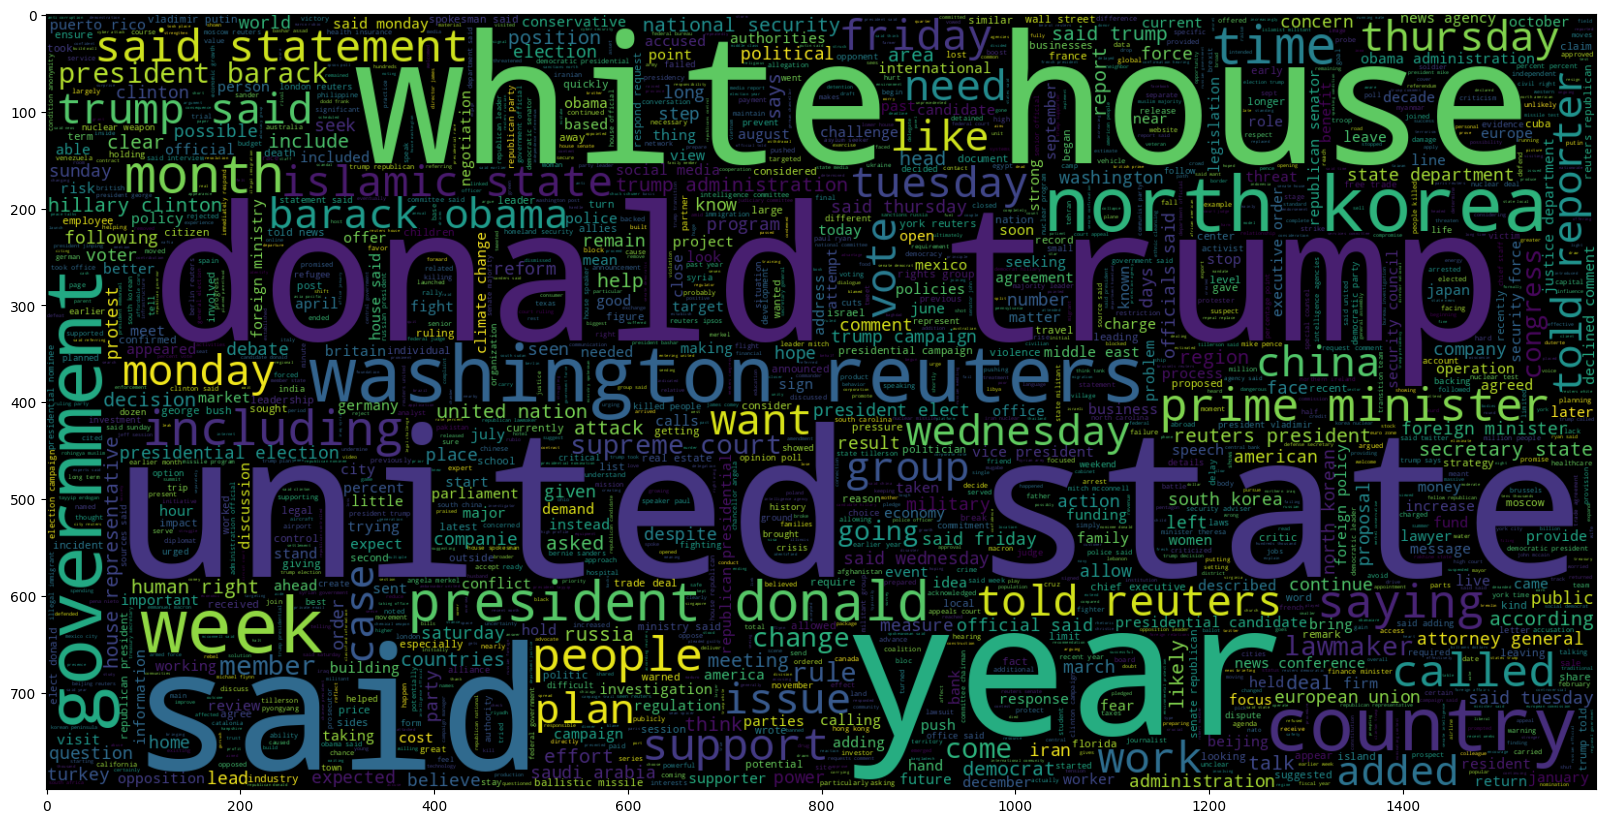

In [20]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

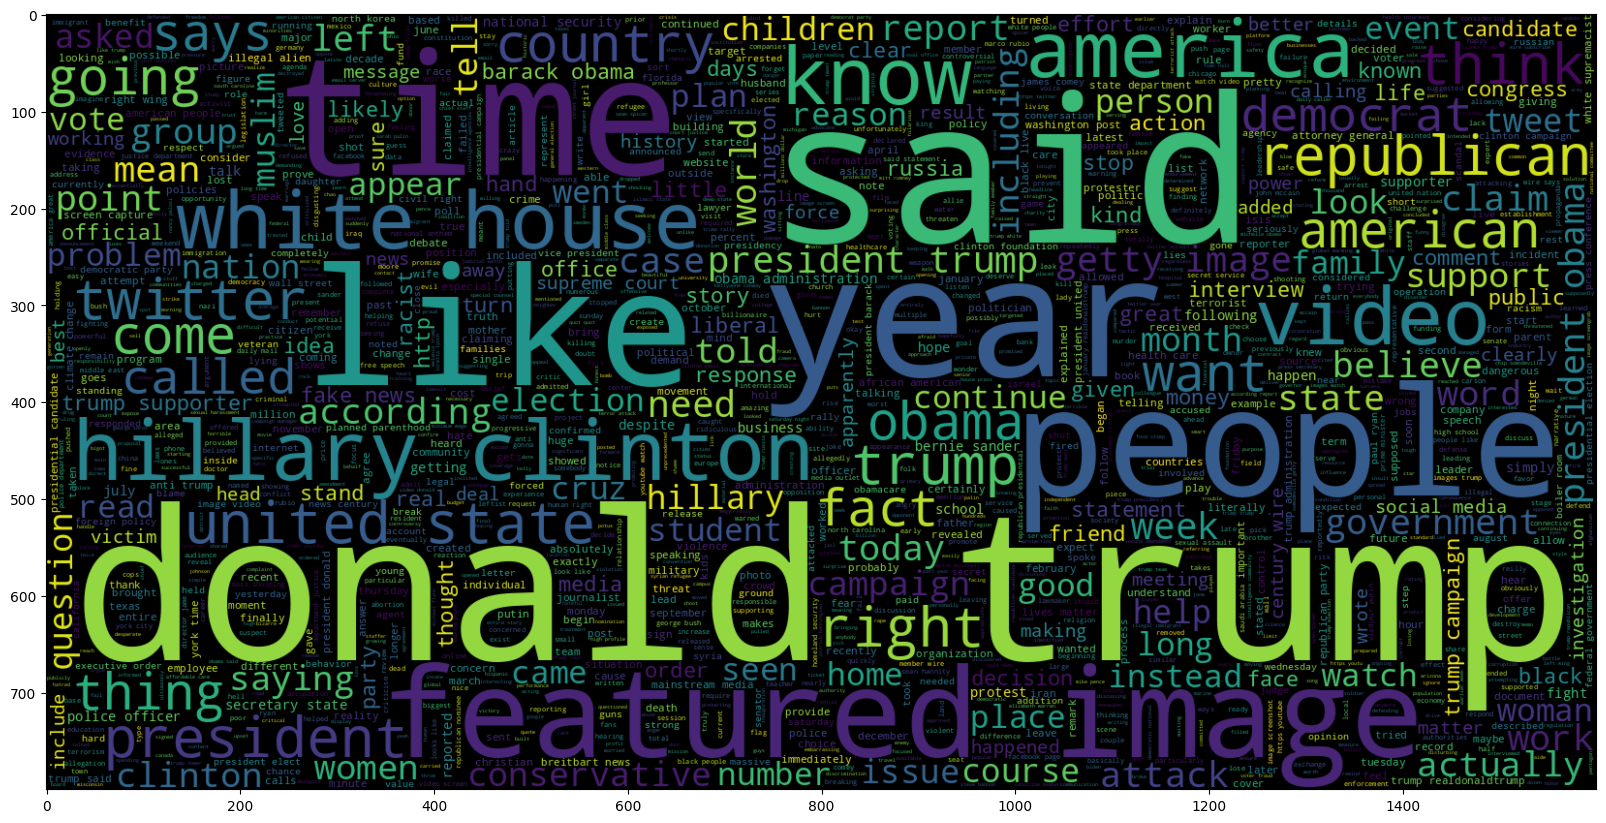

In [21]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [22]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [23]:
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [24]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)
from nltk import word_tokenize

In [25]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [26]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [    1  5713  1415    40 13933 17492   154   244  3773   810    86  1889
    10     1  3035  2751    30    61   158   819   763  1343  1003  3751
   237    85    42   599    65    11   873  1594   388   858   347  1149
   484   652  6823    18]
The padded encoding for document 2  is :  [  911   934  7895   167  1160 11140     1    44  2743    67    36    27
    10     1 17158    36    45    19  1246   483  1023    18   692  1846
  9425  1448  3343   136   121   118    36   450    36  1806  2063   121
   933  6657    16    12]


In [33]:
cnn_model = Sequential()

cnn_model.add(Embedding(total_words, output_dim=128, input_length=40))

cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           13914112  
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 128)           0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [28]:
total_words

108704

In [34]:
history = cnn_model.fit(padded_train, y_train, batch_size=64, validation_split=0.2, epochs=20)

Epoch 1/20
449/449 [==============================] - 179s 397ms/step - loss: 0.0703 - accuracy: 0.9793 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 2/20
449/449 [==============================] - 184s 409ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 3/20
449/449 [==============================] - 162s 360ms/step - loss: 2.6590e-04 - accuracy: 0.9999 - val_loss: 0.0081 - val_accuracy: 0.9983
Epoch 4/20
449/449 [==============================] - 162s 362ms/step - loss: 1.8880e-04 - accuracy: 0.9999 - val_loss: 0.0094 - val_accuracy: 0.9981
Epoch 5/20
449/449 [==============================] - 173s 386ms/step - loss: 2.5327e-05 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9983
Epoch 6/20
449/449 [==============================] - 166s 371ms/step - loss: 1.6075e-05 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9983
Epoch 7/20
449/449 [==============================] - 169s 375ms/step - loss: 1.0196e-05 - accuracy: 1.0000 

In [35]:
# Make predictions on the test set
cnn_detect = cnn_model.predict(padded_test)
cnn_predictions = (cnn_detect > 0.5).astype(int)

# Calculate and print metrics
cnn_accuracy = accuracy_score(list(y_test), cnn_predictions)
cnn_precision = precision_score(list(y_test), cnn_predictions)
cnn_recall = recall_score(list(y_test), cnn_predictions)
cnn_f1 = f1_score(list(y_test), cnn_predictions)

print("\nCNN Model Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)

# Display a classification report
print("\nClassification Report for CNN Model:")
print(classification_report(list(y_test), cnn_predictions, target_names=['Fake', 'Reliable']))

281/281 [==============================] - 3s 8ms/step

CNN Model Metrics:
Accuracy: 0.9979955456570155
Precision: 0.9967816091954023
Recall: 0.9990783410138249
F1 Score: 0.9979286536248562

Classification Report for CNN Model:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4640
    Reliable       1.00      1.00      1.00      4340

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



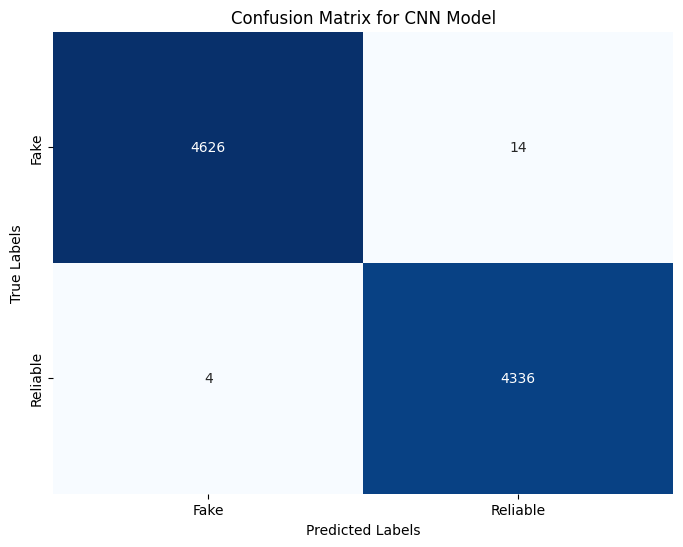

In [37]:
cnn_cm = confusion_matrix(list(y_test), cnn_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Fake', 'Reliable'], yticklabels=['Fake', 'Reliable'])
plt.title("Confusion Matrix for CNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

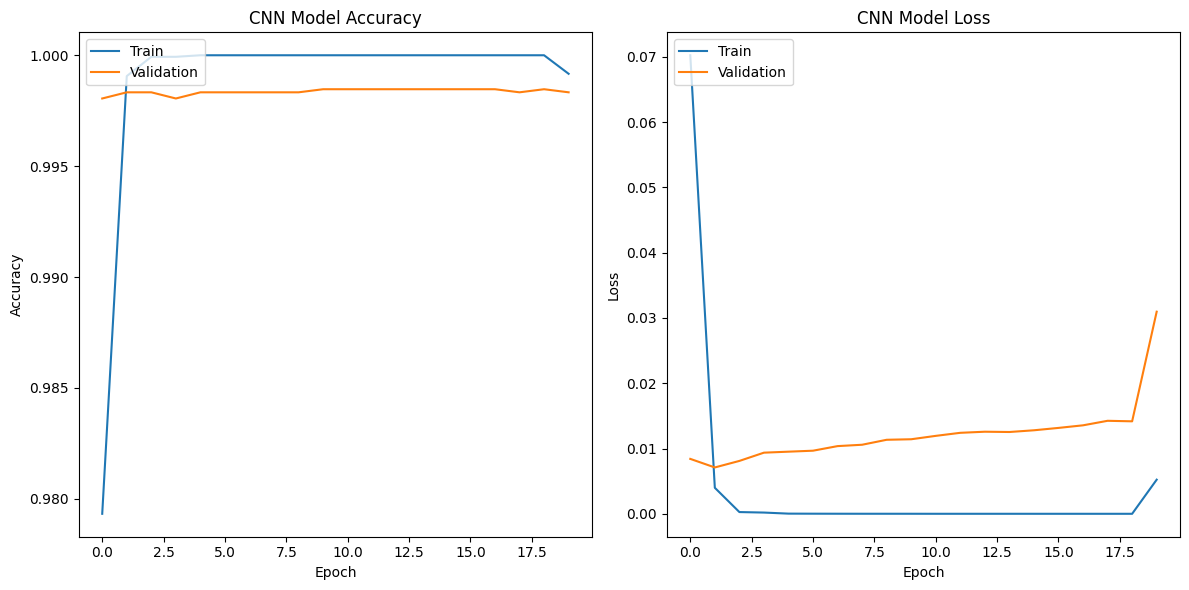

In [41]:
def plot_history(history):
    # Plot training & testing accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & testing loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Display the training history plots for CNN model
plot_history(history)


In [38]:
# category dict
category = { 0: 'Fake News', 1 : "Reliable News"}


-------------------------------------